# QISKIT VERSION

Authors: Raquel Alfonso Rodríguez and Miranda Carou Laíño

This is the Qiskit version of the Quantum Autoencoder.

In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
from qiskit.visualization import array_to_latex
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np
import time

### Function to create the circuit

In [2]:
def qc_autoenc(num_qubits):

    num_layers = 2
    qc = QuantumCircuit(num_qubits)
    
    # Encoder layer
    for i in range(num_qubits):

        qc.rx(2*np.pi/(1*(i+1)),i)
        qc.ry(2*np.pi/(2*(i+1)),i)

    # Variational layer
    for l in range(num_layers):

        for i in range(num_qubits):
            for j in range(i+1, num_qubits):
                qc.cx(i,j)

        qc.barrier()

        for i in range(num_qubits):

            qc.rx(2*np.pi*(l+1)/(3*(i+1)),i)
            qc.ry(2*np.pi*(l+1)/(4*(i+1)),i)
            qc.rz(2*np.pi*(l+1)/(5*(i+1)),i)

    qc.barrier()

    # Decoder layer
    for i in range(num_qubits):

        qc.ry(-2*np.pi/(2*(i+1)),i)
        qc.rx(-2*np.pi/(1*(i+1)),i)

    qc.save_statevector()
    qc.measure_all()
    qc.draw('mpl')
    
    return(qc)

### Statevector execution

In [3]:
range_qubits = 25

In [4]:
time_statevector_mean = []
time_statevector_median = []
time_statevector_std = []

for i in range(1, range_qubits+1):
    
    time_executions = []
    
    qc = qc_autoenc(i)
    
    for i in range(20):
        
        time_ini = time.time()

        simulator = AerSimulator()
        result = simulator.run(qc).result()
        statevector = Statevector(result.data(0)['statevector'])
        
        # display(statevector.draw('latex'))
        
        time_fin = time.time()
        
        time_executions.append(time_fin-time_ini)
        
    
    mean = np.mean(time_executions)
    median = np.median(time_executions)
    std = np.var(time_executions)
    
    time_statevector_mean.append(mean)
    time_statevector_median.append(median)
    time_statevector_std.append(std)

#### Statevector Plot

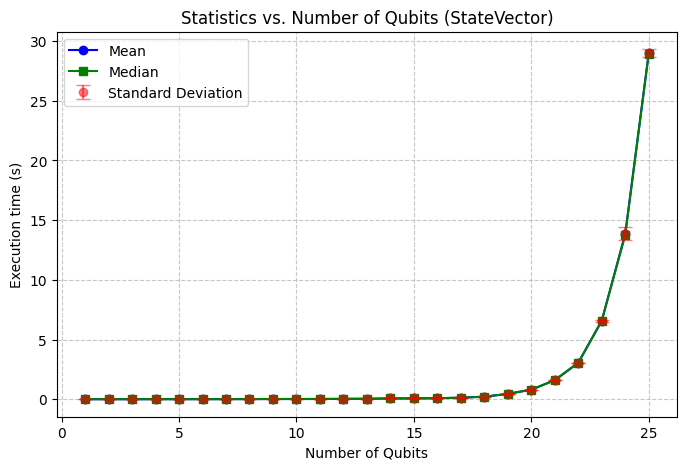

In [14]:
time_statevector_mean = [np.float64(0.012664222717285156), np.float64(0.012765610218048095), np.float64(0.013577485084533691), np.float64(0.015175092220306396), np.float64(0.016948246955871583), np.float64(0.0191591739654541), np.float64(0.0215368390083313), np.float64(0.02385733127593994), np.float64(0.027008724212646485), np.float64(0.02956562042236328), np.float64(0.03416720628738403), np.float64(0.041432511806488034), np.float64(0.053324127197265626), np.float64(0.07642272710800171), np.float64(0.08314082622528077), np.float64(0.09741437435150146), np.float64(0.1398194193840027), np.float64(0.22799140214920044), np.float64(0.45047988891601565), np.float64(0.8139252424240112), np.float64(1.6051939845085144), np.float64(3.0685528755187987), np.float64(6.570171320438385), np.float64(13.853509843349457), np.float64(28.965459644794464)]
time_statevector_median = [np.float64(0.015890836715698242), np.float64(0.01586925983428955), np.float64(0.015935182571411133), np.float64(0.015961170196533203), np.float64(0.015991687774658203), np.float64(0.016017794609069824), np.float64(0.016066789627075195), np.float64(0.023839592933654785), np.float64(0.03174006938934326), np.float64(0.03177917003631592), np.float64(0.03183138370513916), np.float64(0.04761803150177002), np.float64(0.04803895950317383), np.float64(0.07954299449920654), np.float64(0.07999157905578613), np.float64(0.09591925144195557), np.float64(0.14361333847045898), np.float64(0.22255873680114746), np.float64(0.46999359130859375), np.float64(0.8135337829589844), np.float64(1.6074676513671875), np.float64(3.045045852661133), np.float64(6.594190716743469), np.float64(13.749736189842224), np.float64(28.922338247299194)]
time_statevector_std = [np.float64(6.608577283145676e-05), np.float64(3.327043232999927e-05), np.float64(3.25510887131486e-05), np.float64(1.2529306954291996e-05), np.float64(3.526315380156575e-05), np.float64(3.830893016584014e-05), np.float64(5.554807316613619e-05), np.float64(5.661497862035958e-05), np.float64(5.856341571529811e-05), np.float64(2.8391929331519345e-05), np.float64(3.170845038923176e-05), np.float64(6.531250890290608e-05), np.float64(5.316699097420496e-05), np.float64(4.1056534497982964e-05), np.float64(0.00014213622453610245), np.float64(1.8521023903872447e-05), np.float64(7.824028301840259e-05), np.float64(0.0002742097057982562), np.float64(0.0010544019151632257), np.float64(0.0002410393795963728), np.float64(0.00034457178332147014), np.float64(0.005617109367002513), np.float64(0.06694114729258602), np.float64(0.5553562714692127), np.float64(0.34195597761812946)]

qubits = list(range(1,range_qubits+1))

plt.figure(figsize=(8, 5))
plt.plot(qubits, time_statevector_mean, 'o-', label='Mean', color='blue')
plt.plot(qubits, time_statevector_median, 's-', label='Median', color='green')
plt.errorbar(qubits, time_statevector_mean, yerr=time_statevector_std, 
           fmt='o', capsize=5, label='Standard Deviation', color='red', alpha=0.5)
 
# Añadir etiquetas y leyenda
plt.xlabel('Number of Qubits')
plt.ylabel('Execution time (s)')
plt.title('Statistics vs. Number of Qubits (StateVector)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('qiskit_statevector.png')
plt.show()

### Measurement execution

In [7]:
time_run_mean = []
time_run_median = []
time_run_std = []

for i in range(1, range_qubits+1):
    
    time_executions = []
    
    qc = qc_autoenc(i)
    
#     display(qc.draw('mpl'))
    
    for i in range(20):
        
        time_ini = time.time()

        simulator = AerSimulator()
        job_simulator = simulator.run(qc, shots = 2048)
        result_simulator = job_simulator.result()
        counts = result_simulator.get_counts()
        
        # display(statevector.draw('latex'))
        
        time_fin = time.time()
        
        time_executions.append(time_fin-time_ini)
        
    
#     print(len(time_executions))
#     print(time_executions)
    
    mean = np.mean(time_executions)
    median = np.median(time_executions)
    var = np.std(time_executions)
    
    time_run_mean.append(mean)
    time_run_median.append(median)
    time_run_std.append(std)

#### Measurement Plot

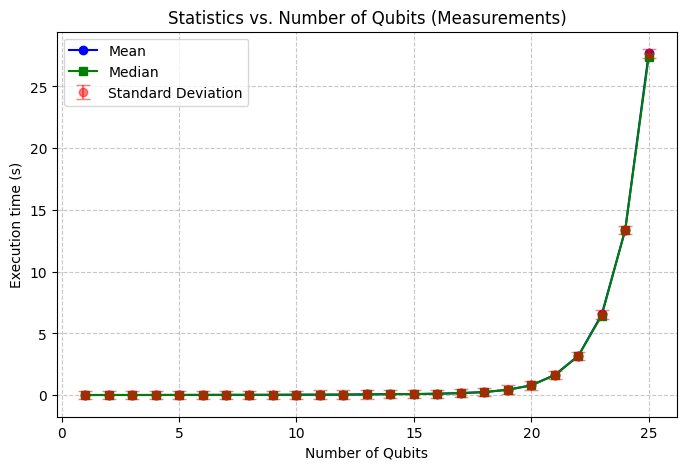

In [15]:
time_run_mean = [np.float64(0.01924166679382324), np.float64(0.02025502920150757), np.float64(0.020159339904785155), np.float64(0.0208797812461853), np.float64(0.023967671394348144), np.float64(0.024760162830352782), np.float64(0.028568720817565917), np.float64(0.030518925189971922), np.float64(0.03593745231628418), np.float64(0.040648889541625974), np.float64(0.044300186634063723), np.float64(0.05452941656112671), np.float64(0.0659685730934143), np.float64(0.08968360424041748), np.float64(0.09267462491989135), np.float64(0.12149980068206787), np.float64(0.17066011428833008), np.float64(0.2556799650192261), np.float64(0.44787120819091797), np.float64(0.7965616941452026), np.float64(1.6522178053855896), np.float64(3.1785610795021055), np.float64(6.547336542606354), np.float64(13.394188868999482), np.float64(27.675437021255494)]
time_run_median = [np.float64(0.016177892684936523), np.float64(0.019152045249938965), np.float64(0.01983952522277832), np.float64(0.020725607872009277), np.float64(0.023894190788269043), np.float64(0.03171110153198242), np.float64(0.03168010711669922), np.float64(0.03185760974884033), np.float64(0.03214430809020996), np.float64(0.04554271697998047), np.float64(0.04731464385986328), np.float64(0.04833102226257324), np.float64(0.06396520137786865), np.float64(0.09439289569854736), np.float64(0.0956951379776001), np.float64(0.1257697343826294), np.float64(0.17506182193756104), np.float64(0.25517594814300537), np.float64(0.43842482566833496), np.float64(0.8078995943069458), np.float64(1.623184084892273), np.float64(3.181177020072937), np.float64(6.454962372779846), np.float64(13.40456473827362), np.float64(27.425247073173523)]
time_statevector_std = [np.float64(0.34195597761812946), np.float64(0.34195597761812946), np.float64(0.34195597761812946), np.float64(0.34195597761812946), np.float64(0.34195597761812946), np.float64(0.34195597761812946), np.float64(0.34195597761812946), np.float64(0.34195597761812946), np.float64(0.34195597761812946), np.float64(0.34195597761812946), np.float64(0.34195597761812946), np.float64(0.34195597761812946), np.float64(0.34195597761812946), np.float64(0.34195597761812946), np.float64(0.34195597761812946), np.float64(0.34195597761812946), np.float64(0.34195597761812946), np.float64(0.34195597761812946), np.float64(0.34195597761812946), np.float64(0.34195597761812946), np.float64(0.34195597761812946), np.float64(0.34195597761812946), np.float64(0.34195597761812946), np.float64(0.34195597761812946), np.float64(0.34195597761812946)]

qubits = list(range(1,range_qubits+1))

plt.figure(figsize=(8, 5))
plt.plot(qubits, time_run_mean, 'o-', label='Mean', color='blue')
plt.plot(qubits, time_run_median, 's-', label='Median', color='green')
plt.errorbar(qubits, time_run_mean, yerr=time_statevector_std, 
           fmt='o', capsize=5, label='Standard Deviation', color='red', alpha=0.5)
 
# Añadir etiquetas y leyenda
plt.xlabel('Number of Qubits')
plt.ylabel('Execution time (s)')
plt.title('Statistics vs. Number of Qubits (Measurements)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('qiskit_measurements.png')
plt.show()

## Comparison between MPIQulacs and Qiskit

In [6]:
node1_statevector_means = [3.8683414459228516e-05, 7.499456405639649e-05, 0.0001401185989379883, 0.00019794702529907227, 0.0002591371536254883, 0.0003391265869140625, 0.0004084587097167969, 0.0005269050598144531, 0.0006426811218261719, 0.0008861660957336426, 0.0012375712394714355, 0.008856618404388427, 0.08623356819152832, 0.09661667346954346, 0.10771846771240234, 0.11972918510437011, 0.1331695318222046, 0.1472186803817749, 0.26462277173995974, 0.18509286642074585, 0.23849538564682007, 0.3283983588218689, 0.5125646710395813, 0.8119250297546386, 1.6285017609596253]
node1_measurement_means = [0.004580485820770264, 0.004649960994720459, 0.004770421981811523, 0.004724609851837158, 0.004787337779998779, 0.004940783977508545, 0.005086660385131836, 0.005250120162963867, 0.005542206764221192, 0.006128048896789551, 0.006558895111083984, 0.01430356502532959, 0.09230033159255982, 0.10306512117385865, 0.1224543571472168, 0.126719331741333, 0.14099453687667846, 0.15790040493011476, 0.17553725242614746, 0.2123394012451172, 0.330178439617157, 0.5411949396133423, 0.6369452834129333, 1.1315298914909362, 2.3077094554901123]

node2_statevector_means = [3.735423088073731e-05, 7.38382339477539e-05, 0.0007413685321807862, 0.0004626929759979248, 0.0006688833236694336, 0.0006236135959625244, 0.0007480442523956299, 0.00086747407913208, 0.0009551107883453369, 0.0011565327644348145, 0.0014940619468688965, 0.0020819544792175294, 0.01069452166557312, 0.09221689105033874, 0.103792005777359, 0.11637887358665466, 0.13167348504066467, 0.15113539695739747, 0.2188287317752838, 0.28555900454521177, 0.3063001275062561, 0.5076670050621033, 0.9181169986724853, 1.7444359183311462, 3.2846137464046476]
node2_measurement_means = [0.004598450660705566, 0.004706168174743652, 0.005637425184249878, 0.005081826448440551, 0.005167871713638306, 0.005380553007125854, 0.005565387010574341, 0.005694383382797241, 0.005894458293914795, 0.006216812133789063, 0.008227354288101197, 0.00783887505531311, 0.016513603925704955, 0.09767839312553406, 0.11138134598731994, 0.12279699444770813, 0.14812223315238954, 0.1591442584991455, 0.20017839074134827, 0.2348209798336029, 0.4527072310447693, 0.6469590425491333, 1.0412537574768066, 1.9502140939235688, 3.459108608961105]

node4_statevector_means = [3.722012042999268e-05, 7.373988628387452e-05, 0.0001417011022567749, 0.0020201176404953, 0.0006639868021011353, 0.0007701486349105835, 0.0008766889572143554, 0.0010497897863388061, 0.001195862889289856, 0.0012848109006881713, 0.0015347272157669068, 0.0030176997184753417, 0.002746546268463135, 0.012571215629577637, 0.09851302206516266, 0.16178927421569825, 0.13809652328491212, 0.14428448379039766, 0.2053142547607422, 0.2738739579916, 0.30788652002811434, 0.5500131607055664, 0.8150175124406814, 1.9172065138816834, 3.3857883483171465]
node4_measurement_means = [0.004663094878196716, 0.004665249586105346, 0.004722490906715393, 0.005910071730613709, 0.005375984311103821, 0.00555230975151062, 0.005719622969627381, 0.005940571427345276, 0.006146752834320068, 0.006346169114112854, 0.006709715723991394, 0.007731968164443969, 0.008551260828971863, 0.018439865112304686, 0.10554522275924683, 0.13801443874835967, 0.17744719088077546, 0.15863485932350158, 0.19516502916812897, 0.2885125488042831, 0.3188984453678131, 0.569290480017662, 0.90196413397789, 1.7535851657390595, 3.2492032557725907]

node8_statevector_means = [3.790855407714844e-05, 7.472187280654907e-05, 0.00014232099056243896, 0.00019955337047576903, 0.0024187356233596803, 0.0008164256811141968, 0.0009478017687797547, 0.001097606122493744, 0.0013276472687721252, 0.0014944195747375489, 0.0015614867210388184, 0.0018786922097206115, 0.002444891631603241, 0.0034237295389175416, 0.014290799200534821, 0.10372109115123748, 0.27712627649307253, 0.2045779585838318, 0.16606176644563675, 0.19511719942092895, 0.25617814511060716, 0.509562823176384, 0.7214624285697937, 1.323804460465908, 2.9706303104758263]
node8_measurement_means = [0.004605446755886078, 0.004652209579944611, 0.004743795096874237, 0.004761092364788055, 0.006986859440803528, 0.0056935325264930725, 0.005791325867176056, 0.005914822220802307, 0.0062826618552207945, 0.0065755188465118405, 0.006714202463626862, 0.007096634805202484, 0.008450175821781158, 0.00941878855228424, 0.020307810604572298, 0.12488824278116226, 0.12376166880130768, 0.1837489977478981, 0.22478983402252198, 0.2075663059949875, 0.26208449006080625, 0.48465414345264435, 0.7478263303637505, 1.3742831245064735, 2.492196886241436]

node16_statevector_means = [3.733932971954346e-05, 7.518455386161804e-05, 0.00014264360070228576, 0.00019963234663009644, 0.0002626970410346985, 0.003166373074054718, 0.0009889714419841766, 0.0011417679488658905, 0.0013255923986434937, 0.001624104380607605, 0.001827964186668396, 0.0018819071352481841, 0.002255403250455856, 0.002988569438457489, 0.004259095340967178, 0.016028692573308946, 0.10910498201847077, 0.13046006336808205, 0.18562616407871246, 0.17940425947308541, 0.21462029069662095, 0.4315869465470314, 0.5483588077127933, 0.9567646265029908, 1.5864997230470181]
node16_measurement_means = [0.004592255502939224, 0.004718782007694244, 0.004729008674621582, 0.004784842580556869, 0.004888510704040528, 0.007622824609279632, 0.005948429554700851, 0.0060470737516880035, 0.00638301894068718, 0.006807756423950195, 0.0070513270795345305, 0.007148312777280808, 0.007650361955165863, 0.008959207683801651, 0.01044788733124733, 0.025660368055105208, 0.2153889149427414, 0.3166642151772976, 0.178273493796587, 0.17351742312312127, 0.32863462939858434, 0.29640862718224525, 0.5455242075026036, 0.9744751378893852, 1.669393863528967]

qiskit_statevector_means = [np.float64(0.012664222717285156), np.float64(0.012765610218048095), np.float64(0.013577485084533691), np.float64(0.015175092220306396), np.float64(0.016948246955871583), np.float64(0.0191591739654541), np.float64(0.0215368390083313), np.float64(0.02385733127593994), np.float64(0.027008724212646485), np.float64(0.02956562042236328), np.float64(0.03416720628738403), np.float64(0.041432511806488034), np.float64(0.053324127197265626), np.float64(0.07642272710800171), np.float64(0.08314082622528077), np.float64(0.09741437435150146), np.float64(0.1398194193840027), np.float64(0.22799140214920044), np.float64(0.45047988891601565), np.float64(0.8139252424240112), np.float64(1.6051939845085144), np.float64(3.0685528755187987), np.float64(6.570171320438385), np.float64(13.853509843349457), np.float64(28.965459644794464)]
qiskit_measurement_means = [np.float64(0.01924166679382324), np.float64(0.02025502920150757), np.float64(0.020159339904785155), np.float64(0.0208797812461853), np.float64(0.023967671394348144), np.float64(0.024760162830352782), np.float64(0.028568720817565917), np.float64(0.030518925189971922), np.float64(0.03593745231628418), np.float64(0.040648889541625974), np.float64(0.044300186634063723), np.float64(0.05452941656112671), np.float64(0.0659685730934143), np.float64(0.08968360424041748), np.float64(0.09267462491989135), np.float64(0.12149980068206787), np.float64(0.17066011428833008), np.float64(0.2556799650192261), np.float64(0.44787120819091797), np.float64(0.7965616941452026), np.float64(1.6522178053855896), np.float64(3.1785610795021055), np.float64(6.547336542606354), np.float64(13.394188868999482), np.float64(27.675437021255494)]

range_qubits = 25


In [10]:
qubit20_statevector = [node1_statevector_means[19], node2_statevector_means[19], node4_statevector_means[19], node8_statevector_means[19], node16_statevector_means[19]]
qubit20_measurement = [node1_measurement_means[19], node2_measurement_means[19], node4_measurement_means[19], node16_measurement_means[19], node16_measurement_means[19]]

qubit21_statevector = [node1_statevector_means[20], node2_statevector_means[20], node4_statevector_means[20], node8_statevector_means[20], node16_statevector_means[20]]
qubit21_measurement = [node1_measurement_means[20], node2_measurement_means[20], node4_measurement_means[20], node8_measurement_means[20], node16_measurement_means[20]]

qubit22_statevector = [node1_statevector_means[21], node2_statevector_means[21], node4_statevector_means[21], node8_statevector_means[21], node16_statevector_means[21]]
qubit22_measurement = [node1_measurement_means[21], node2_measurement_means[21], node4_measurement_means[21], node8_measurement_means[21], node16_measurement_means[21]]

qubit23_statevector = [node1_statevector_means[22], node2_statevector_means[22], node4_statevector_means[22], node8_statevector_means[22], node16_statevector_means[22]]
qubit23_measurement = [node1_measurement_means[22], node2_measurement_means[22], node4_measurement_means[22], node8_measurement_means[22], node16_measurement_means[22]]

qubit24_statevector = [node1_statevector_means[23], node2_statevector_means[23], node4_statevector_means[23], node8_statevector_means[23], node16_statevector_means[23]]
qubit24_measurement = [node1_measurement_means[23], node2_measurement_means[23], node4_measurement_means[23], node8_measurement_means[23], node16_measurement_means[23]]

qubit25_statevector = [node1_statevector_means[24], node2_statevector_means[24], node4_statevector_means[24], node8_statevector_means[24], node16_statevector_means[24]]
qubit25_measurement = [node1_measurement_means[24], node2_measurement_means[24], node4_measurement_means[24], node8_measurement_means[24], node16_measurement_means[24]]


### Number of qubits VS Time

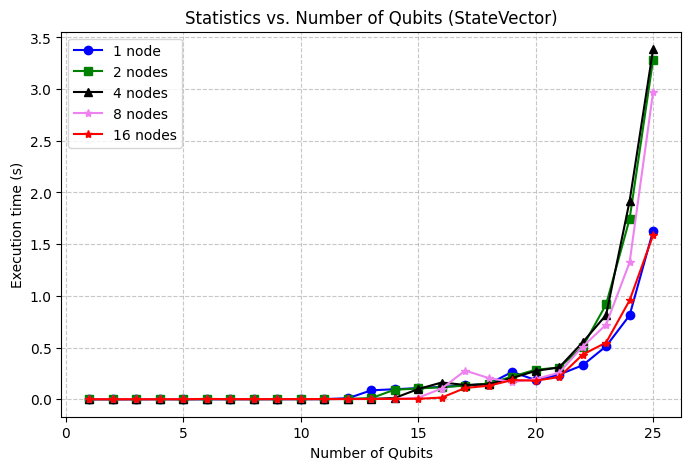

In [8]:
qubits = list(range(1,range_qubits+1))

plt.figure(figsize=(8, 5))
plt.plot(qubits, node1_statevector_means, 'o-', label='1 node', color='blue')
plt.plot(qubits, node2_statevector_means, 's-', label='2 nodes', color='green')
plt.plot(qubits, node4_statevector_means, '^-', label='4 nodes', color='black')
plt.plot(qubits, node8_statevector_means, '*-', label='8 nodes', color='violet')
plt.plot(qubits, node16_statevector_means, '*-', label='16 nodes', color='red')

 
# Añadir etiquetas y leyenda
plt.xlabel('Number of Qubits')
plt.ylabel('Execution time (s)')
plt.title('Statistics vs. Number of Qubits (StateVector)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('QubitsVStime(nodes) - Statevector.png')
plt.show()

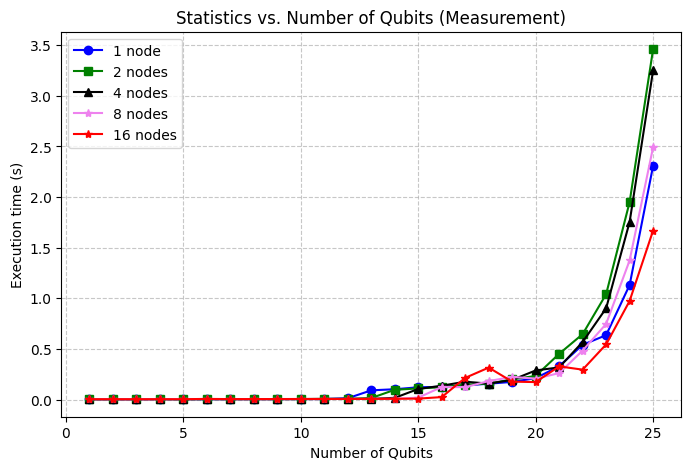

In [9]:
qubits = list(range(1,range_qubits+1))

plt.figure(figsize=(8, 5))
plt.plot(qubits, node1_measurement_means, 'o-', label='1 node', color='blue')
plt.plot(qubits, node2_measurement_means, 's-', label='2 nodes', color='green')
plt.plot(qubits, node4_measurement_means, '^-', label='4 nodes', color='black')
plt.plot(qubits, node8_measurement_means, '*-', label='8 nodes', color='violet')
plt.plot(qubits, node16_measurement_means, '*-', label='16 nodes', color='red')

 
# Añadir etiquetas y leyenda
plt.xlabel('Number of Qubits')
plt.ylabel('Execution time (s)')
plt.title('Statistics vs. Number of Qubits (Measurement)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('QubitsVStime(nodes) - Measurement.png')
plt.show()

### Nodes VS Qubits

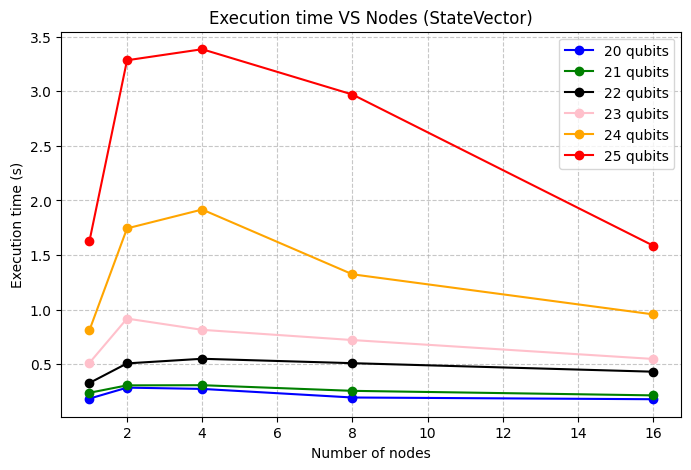

In [11]:
qubits = [1, 2, 4, 8, 16]

plt.figure(figsize=(8, 5))
plt.plot(qubits, qubit20_statevector, 'o-', label='20 qubits', color='blue')
plt.plot(qubits, qubit21_statevector, 'o-', label='21 qubits', color='green')
plt.plot(qubits, qubit22_statevector, 'o-', label='22 qubits', color='black')
plt.plot(qubits, qubit23_statevector, 'o-', label='23 qubits', color='pink')
plt.plot(qubits, qubit24_statevector, 'o-', label='24 qubits', color='orange')
plt.plot(qubits, qubit25_statevector, 'o-', label='25 qubits', color='red')


 
# Añadir etiquetas y leyenda
plt.xlabel('Number of nodes')
plt.ylabel('Execution time (s)')
plt.title('Execution time VS Nodes (StateVector)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('NodesVSTime(qubits) - Statevector.png')
plt.show()

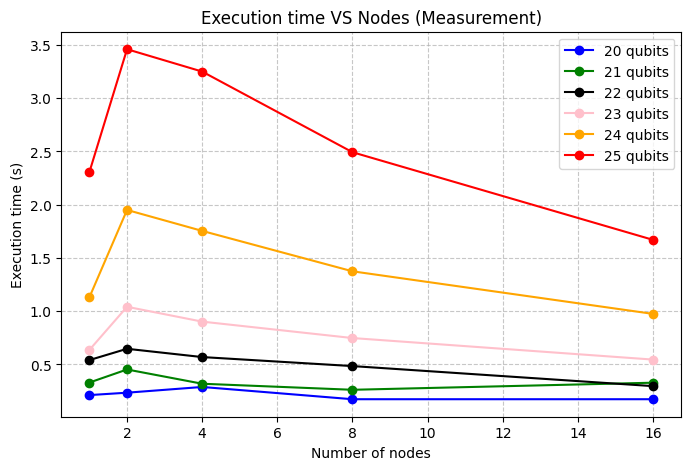

In [12]:
qubits = [1, 2, 4, 8, 16]

plt.figure(figsize=(8, 5))
plt.plot(qubits, qubit20_measurement, 'o-', label='20 qubits', color='blue')
plt.plot(qubits, qubit21_measurement, 'o-', label='21 qubits', color='green')
plt.plot(qubits, qubit22_measurement, 'o-', label='22 qubits', color='black')
plt.plot(qubits, qubit23_measurement, 'o-', label='23 qubits', color='pink')
plt.plot(qubits, qubit24_measurement, 'o-', label='24 qubits', color='orange')
plt.plot(qubits, qubit25_measurement, 'o-', label='25 qubits', color='red')


 
# Añadir etiquetas y leyenda
plt.xlabel('Number of nodes')
plt.ylabel('Execution time (s)')
plt.title('Execution time VS Nodes (Measurement)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('NodesVSTime(qubits) - Measurement.png')
plt.show()

### MPIQulacs VS Qiskit

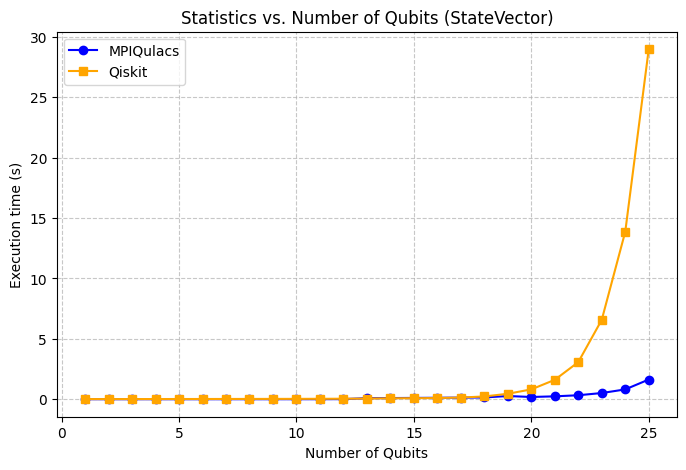

In [11]:
qubits = list(range(1,range_qubits+1))

plt.figure(figsize=(8, 5))
plt.plot(qubits, node1_statevector_means, 'o-', label='MPIQulacs', color='blue')
plt.plot(qubits, qiskit_statevector_means, 's-', label='Qiskit', color='orange')

# Añadir etiquetas y leyenda
plt.xlabel('Number of Qubits')
plt.ylabel('Execution time (s)')
plt.title('Statistics vs. Number of Qubits (StateVector)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('QiskitVSQulacs - Statevector.png')
plt.show()

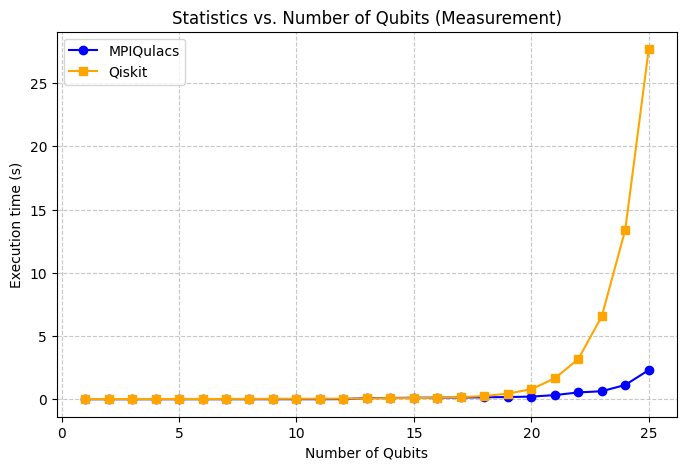

In [12]:
qubits = list(range(1,range_qubits+1))

plt.figure(figsize=(8, 5))
plt.plot(qubits, node1_measurement_means, 'o-', label='MPIQulacs', color='blue')
plt.plot(qubits, qiskit_measurement_means, 's-', label='Qiskit', color='orange')

# Añadir etiquetas y leyenda
plt.xlabel('Number of Qubits')
plt.ylabel('Execution time (s)')
plt.title('Statistics vs. Number of Qubits (Measurement)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('QiskitVSQulacs - Measurement.png')
plt.show()

## Stavector VS Measurement

#### MPIQulacs 1 node

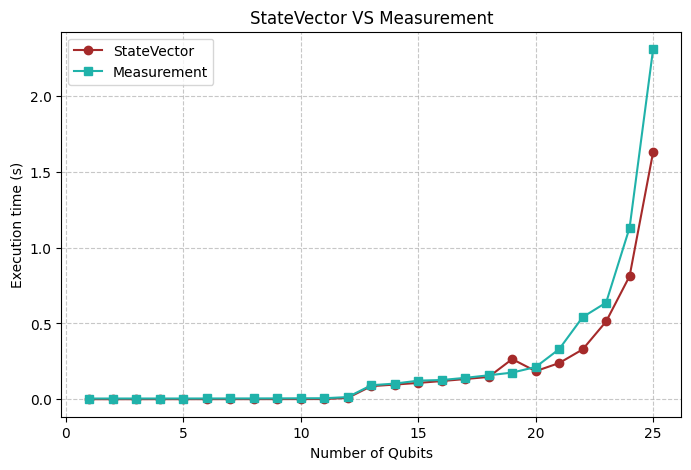

In [30]:
qubits = list(range(1,range_qubits+1))

plt.figure(figsize=(8, 5))
plt.plot(qubits, node1_statevector_means, 'o-', label='StateVector', color='brown')
plt.plot(qubits, node1_measurement_means, 's-', label='Measurement', color='lightseagreen')

# Añadir etiquetas y leyenda
plt.xlabel('Number of Qubits')
plt.ylabel('Execution time (s)')
plt.title('StateVector VS Measurement')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('StatevectorVSMeasurement - node1.png')
plt.show()

#### MPIQulacs 2 nodes

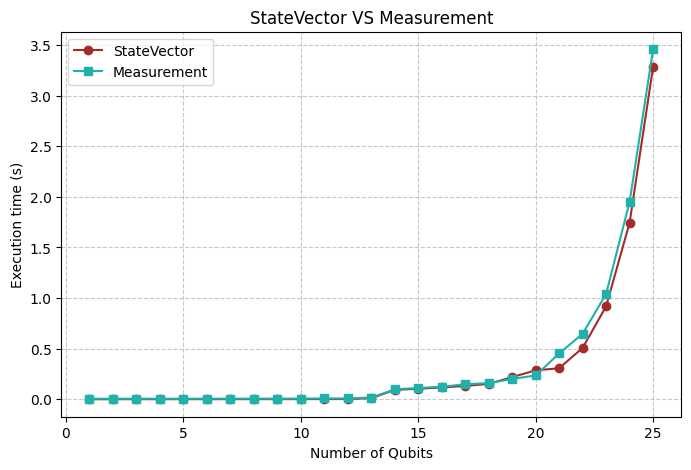

In [31]:
qubits = list(range(1,range_qubits+1))

plt.figure(figsize=(8, 5))
plt.plot(qubits, node2_statevector_means, 'o-', label='StateVector', color='brown')
plt.plot(qubits, node2_measurement_means, 's-', label='Measurement', color='lightseagreen')

# Añadir etiquetas y leyenda
plt.xlabel('Number of Qubits')
plt.ylabel('Execution time (s)')
plt.title('StateVector VS Measurement')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('StatevectorVSMeasurement - node2.png')
plt.show()

#### MPIQulacs 4 nodes

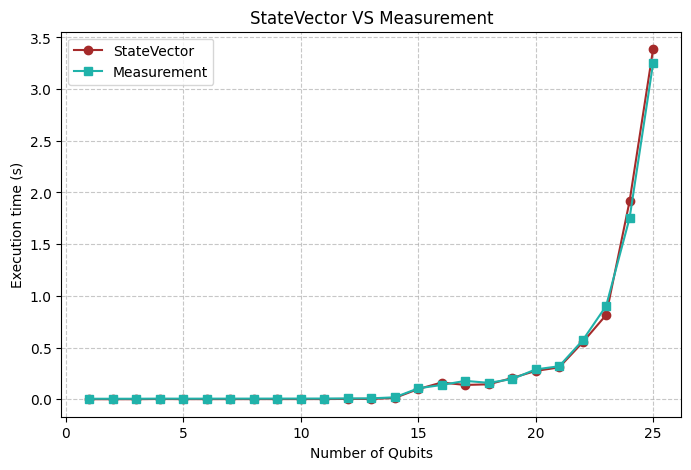

In [32]:
qubits = list(range(1,range_qubits+1))

plt.figure(figsize=(8, 5))
plt.plot(qubits, node4_statevector_means, 'o-', label='StateVector', color='brown')
plt.plot(qubits, node4_measurement_means, 's-', label='Measurement', color='lightseagreen')

# Añadir etiquetas y leyenda
plt.xlabel('Number of Qubits')
plt.ylabel('Execution time (s)')
plt.title('StateVector VS Measurement')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('StatevectorVSMeasurement - node4.png')
plt.show()

#### MPIQulacs 8 nodes

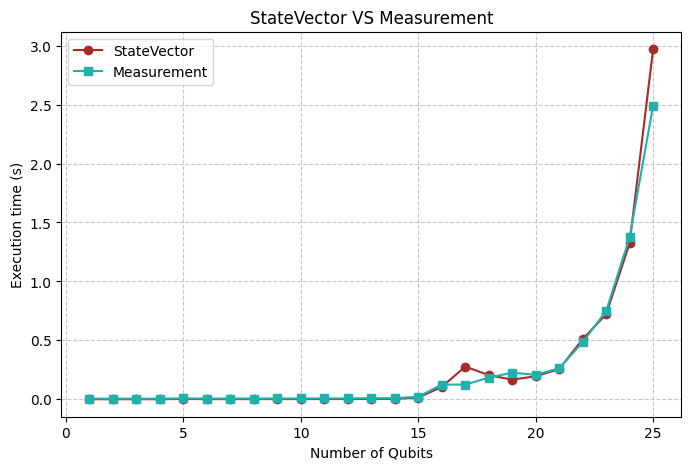

In [13]:
qubits = list(range(1,range_qubits+1))

plt.figure(figsize=(8, 5))
plt.plot(qubits, node8_statevector_means, 'o-', label='StateVector', color='brown')
plt.plot(qubits, node8_measurement_means, 's-', label='Measurement', color='lightseagreen')

# Añadir etiquetas y leyenda
plt.xlabel('Number of Qubits')
plt.ylabel('Execution time (s)')
plt.title('StateVector VS Measurement')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('StatevectorVSMeasurement - node8.png')
plt.show()

#### MPIQulacs 16 nodes

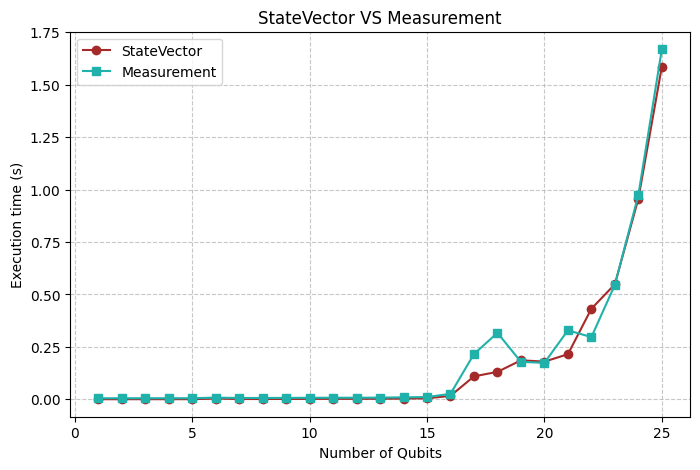

In [33]:
qubits = list(range(1,range_qubits+1))

plt.figure(figsize=(8, 5))
plt.plot(qubits, node16_statevector_means, 'o-', label='StateVector', color='brown')
plt.plot(qubits, node16_measurement_means, 's-', label='Measurement', color='lightseagreen')

# Añadir etiquetas y leyenda
plt.xlabel('Number of Qubits')
plt.ylabel('Execution time (s)')
plt.title('StateVector VS Measurement')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('StatevectorVSMeasurement - node16.png')
plt.show()

#### Qiskit

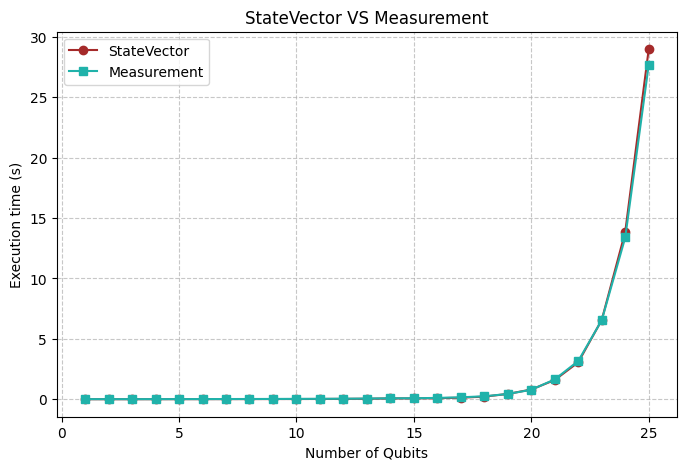

In [34]:
qubits = list(range(1,range_qubits+1))

plt.figure(figsize=(8, 5))
plt.plot(qubits, qiskit_statevector_means, 'o-', label='StateVector', color='brown')
plt.plot(qubits, qiskit_measurement_means, 's-', label='Measurement', color='lightseagreen')

# Añadir etiquetas y leyenda
plt.xlabel('Number of Qubits')
plt.ylabel('Execution time (s)')
plt.title('StateVector VS Measurement')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('StatevectorVSMeasurement - qiskit.png')
plt.show()

### OPTIMIZATION LEVELS

In [20]:
optim0_statevector_means = [3.8683414459228516e-05, 7.499456405639649e-05, 0.0001401185989379883, 0.00019794702529907227, 0.0002591371536254883, 0.0003391265869140625, 0.0004084587097167969, 0.0005269050598144531, 0.0006426811218261719, 0.0008861660957336426, 0.0012375712394714355, 0.008856618404388427, 0.08623356819152832, 0.09661667346954346, 0.10771846771240234, 0.11972918510437011, 0.1331695318222046, 0.1472186803817749, 0.26462277173995974, 0.18509286642074585, 0.23849538564682007, 0.3283983588218689, 0.5125646710395813, 0.8119250297546386, 1.6285017609596253]
optim0_measurement_means = [0.004580485820770264, 0.004649960994720459, 0.004770421981811523, 0.004724609851837158, 0.004787337779998779, 0.004940783977508545, 0.005086660385131836, 0.005250120162963867, 0.005542206764221192, 0.006128048896789551, 0.006558895111083984, 0.01430356502532959, 0.09230033159255982, 0.10306512117385865, 0.1224543571472168, 0.126719331741333, 0.14099453687667846, 0.15790040493011476, 0.17553725242614746, 0.2123394012451172, 0.330178439617157, 0.5411949396133423, 0.6369452834129333, 1.1315298914909362, 2.3077094554901123]

optim1_statevector_means = [1.3148784637451172e-05, 5.273818969726562e-05, 4.965066909790039e-05, 8.014440536499023e-05, 0.00011737346649169922, 0.00015805959701538087, 0.00020966529846191406, 0.00027059316635131837, 0.0003547072410583496, 0.000494384765625, 0.0007307410240173339, 0.0012529373168945312, 0.04844363927841187, 0.05601760149002075, 0.06345539093017578, 0.0719796061515808, 0.08199158906936646, 0.0926123857498169, 0.10566707849502563, 0.12408955097198486, 0.15854986906051635, 0.22416661977767943, 0.3400114059448242, 0.5945086479187012, 1.216693651676178]
optim1_measurement_means = [0.004849791526794434, 0.004983079433441162, 0.0049441933631896974, 0.005121195316314697, 0.005150735378265381, 0.00546039342880249, 0.00560990571975708, 0.005802440643310547, 0.006134951114654541, 0.006747734546661377, 0.007137322425842285, 0.007803404331207275, 0.05482076406478882, 0.0627288579940796, 0.0708499789237976, 0.0818328619003296, 0.0909817099571228, 0.10328774452209473, 0.11860203742980957, 0.14980190992355347, 0.23243334293365478, 0.3170293927192688, 0.48861238956451414, 1.0082525491714478, 1.6069770812988282]

optim2_statevector_means = [1.4173984527587891e-05, 2.6905536651611327e-05, 5.4454803466796876e-05, 9.049177169799805e-05, 0.00012753009796142578, 0.00017484426498413086, 0.00023595094680786132, 0.00029265880584716797, 0.00039347410202026365, 0.0005462288856506348, 0.0007881641387939454, 0.0013250350952148438, 0.05120494365692139, 0.0553343653678894, 0.06329708099365235, 0.07195180654525757, 0.08187462091445923, 0.09293133020401001, 0.11714061498641967, 0.12190563678741455, 0.16001328229904174, 0.22513376474380492, 0.4901897668838501, 0.5768944621086121, 1.0776859402656556]
optim2_measurement_means = [0.004802834987640381, 0.004958117008209228, 0.005087888240814209, 0.005181300640106201, 0.00542147159576416, 0.00573807954788208, 0.006117320060729981, 0.006400585174560547, 0.006907129287719726, 0.00774679183959961, 0.00839003324508667, 0.00934377908706665, 0.06259210109710693, 0.06438100337982178, 0.07322106361389161, 0.08291237354278565, 0.09422920942306519, 0.10750254392623901, 0.12272590398788452, 0.16373419761657715, 0.36996307373046877, 0.3074989438056946, 0.4981981873512268, 1.0663666248321533, 1.7407808661460877]

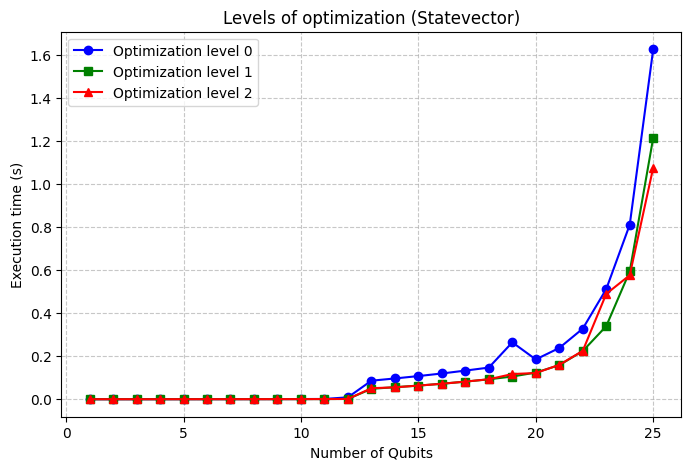

In [24]:
qubits = list(range(1,range_qubits+1))

plt.figure(figsize=(8, 5))
plt.plot(qubits, optim0_statevector_means, 'o-', label='Optimization level 0', color='blue')
plt.plot(qubits, optim1_statevector_means, 's-', label='Optimization level 1', color='green')
plt.plot(qubits, optim2_statevector_means, '^-', label='Optimization level 2', color='red')

 
# Añadir etiquetas y leyenda
plt.xlabel('Number of Qubits')
plt.ylabel('Execution time (s)')
plt.title('Levels of optimization (Statevector)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('Optims_statevector.png')
plt.show()

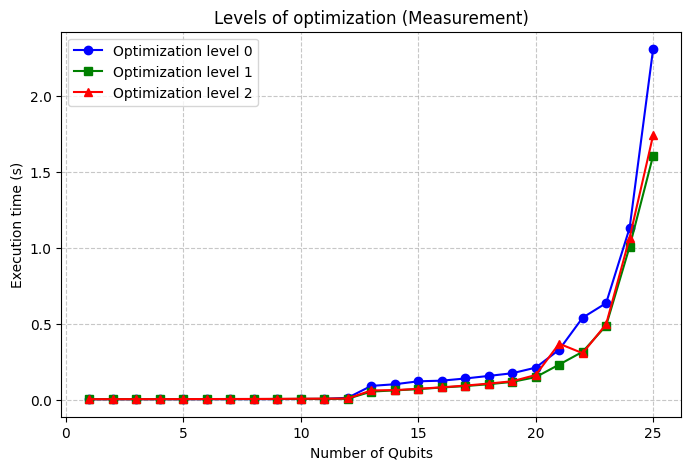

In [25]:
qubits = list(range(1,range_qubits+1))

plt.figure(figsize=(8, 5))
plt.plot(qubits, optim0_measurement_means, 'o-', label='Optimization level 0', color='blue')
plt.plot(qubits, optim1_measurement_means, 's-', label='Optimization level 1', color='green')
plt.plot(qubits, optim2_measurement_means, '^-', label='Optimization level 2', color='red')

 
# Añadir etiquetas y leyenda
plt.xlabel('Number of Qubits')
plt.ylabel('Execution time (s)')
plt.title('Levels of optimization (Measurement)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('Optims_measurement.png')
plt.show()